In [1]:
import pandas as pd
import numpy as np
import pyarrow
import os
import math
import re
from collections import Counter
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [2]:
path1 = r'E:\netData\APS\3 Paper\aps-papers-2010-CD5.zip'
path2 = r'E:\netData\APS\3 Paper\aps-papers-2010-SB.zip'
path3 = r'E:\netData\APS\3 Paper\nodepro2010.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [4]:
f2['CD5'] = f1['CD5']
f2['indegree'] = f3['indegree']
f2['cit5'] = f3['cit5']
f2['outdegree'] = f3['outdegree']
f2['year'] = f3['year']
f2['team size'] = f3['team size']
f2['first_cit_y'] = f3['first_cit_y']
f2['journal'] = f3['journal']
df = f2[f2['indegree']>10]
df = df[df['outdegree']>0]
df.index = range(len(df))
del df['id']

In [5]:
df['journal'] = df['journal'].map(dict(zip(df['journal'].unique() , np.concatenate([df['journal'].unique()[:7],np.array(['Physical Review']),df['journal'].unique()[8:]]))))

In [ ]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

# B

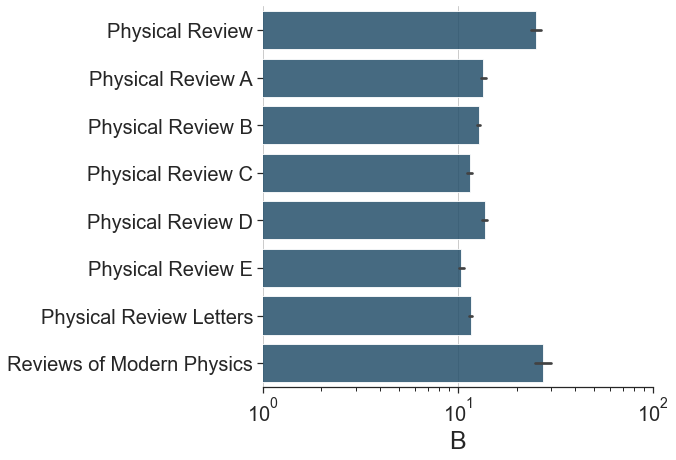

In [39]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(data=df,x=r'B', y="journal", color= '#1A5276',alpha = .85)
ax.set_xscale("log")
ax.xaxis.grid(True)
plt.xticks([10e-1 , 10e0 , 10e1] , size = 20)
plt.yticks(size = 20)
plt.xlabel(r'B',fontsize = 25)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\a1.pdf",bbox_inches = 'tight')

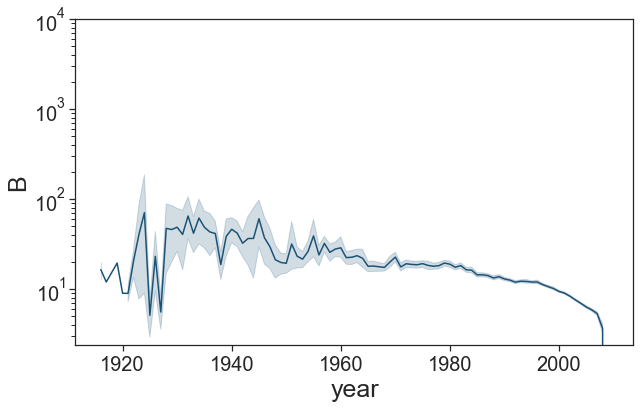

In [34]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False
g = sns.lineplot(data=df,x=r'year', y=r"B",c='#1A5276')
ax.set_yscale("log")
g.set_xticks([1920,1940,1960,1980,2000])
g.set_yticks([10e0,10e1,10e2,10e3])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('B',fontsize = 25)
plt.xlabel('year',fontsize = 25)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\a2.pdf",bbox_inches = 'tight')

# da

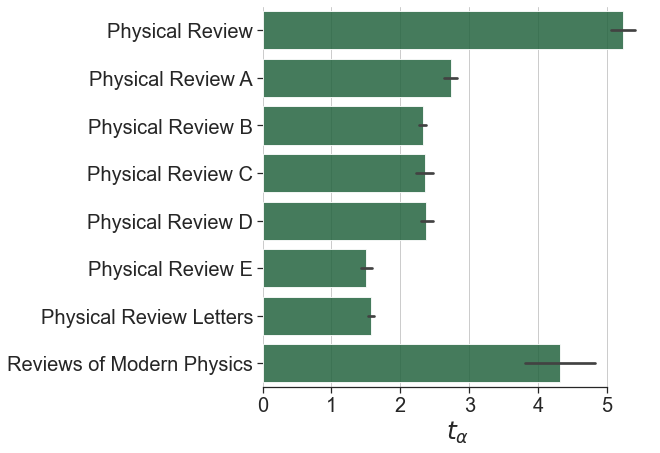

In [38]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(data=df,x=r'da', y="journal", color= '#196F3D',alpha = .85)
#ax.set_xscale("log")
ax.xaxis.grid(True)
plt.xticks( size = 20)
plt.yticks(size = 20)
plt.xlabel(r'$\mathit{t}_{\mathit{\alpha}}$',fontsize = 25)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\b1.pdf",bbox_inches = 'tight')

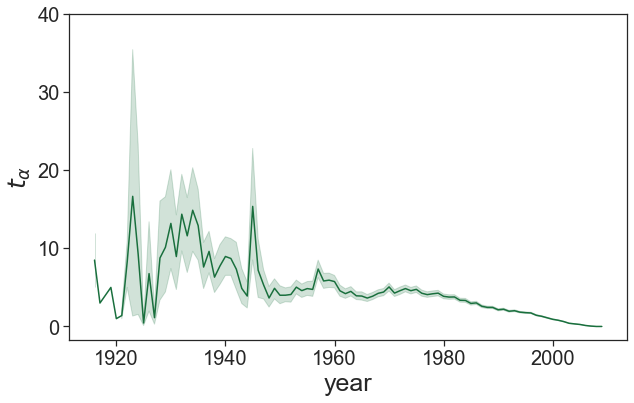

In [35]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False
g = sns.lineplot(data=df,x=r'year', y=r"da",c='#196F3D')
#ax.set_yscale("log")
g.set_xticks([1920,1940,1960,1980,2000])
g.set_yticks([0,10,20,30,40])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel(r'$\mathit{t}_{\mathit{\alpha}}$',fontsize = 25)
plt.xlabel('year',fontsize = 25)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\b2.pdf",bbox_inches = 'tight')

# CD5

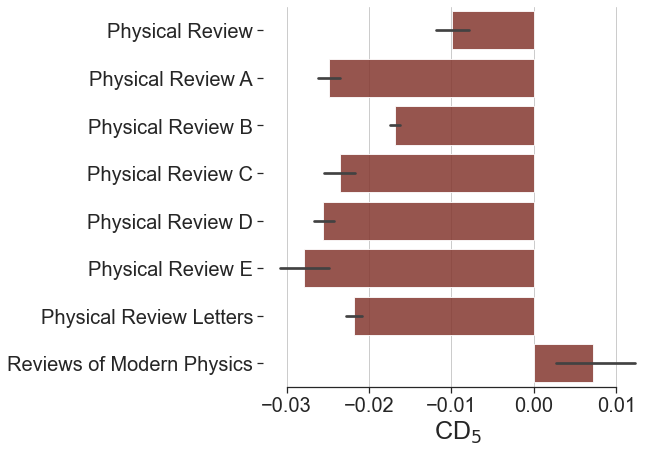

In [41]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(data=df,x=r'CD5', y="journal", color= '#922B21',alpha = .85)
#ax.set_xscale("log")
ax.xaxis.grid(True)
plt.xticks( size = 20)
plt.yticks(size = 20)
plt.xlabel(r'CD$_5$',fontsize = 25)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\c1.pdf",bbox_inches = 'tight')

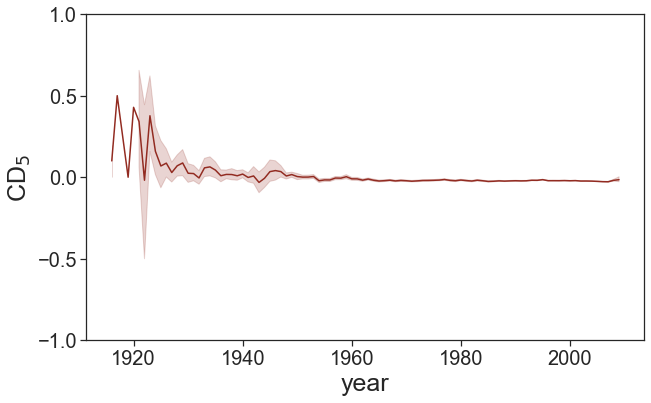

In [43]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False
g = sns.lineplot(data=df,x=r'year', y=r"CD5",c='#922B21')
#ax.set_yscale("log")
g.set_xticks([1920,1940,1960,1980,2000])
g.set_yticks([-1,-0.5,0,0.5,1])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel(r'CD$_5$',fontsize = 25)
plt.xlabel('year',fontsize = 25)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\c2.pdf",bbox_inches = 'tight')

In [40]:
df

,B,da,CD5,indegree,cit5,outdegree,year,team size,first_cit_y,journal
0,11.984,3,0.500000,17,4.0,2,1917,1,4,Physical Review
1,28.932,2,-0.024943,36,11.0,23,1955,2,0,Physical Review
2,26.899,10,-0.005348,43,4.0,13,1955,2,1,Physical Review
3,7.324,0,-0.136364,27,9.0,7,1955,2,1,Physical Review
4,77.036,43,-0.014706,16,3.0,7,1955,2,2,Physical Review
...,...,...,...,...,...,...,...,...,...,...
114180,0.000,0,-0.002802,12,12.0,110,2009,3,0,Reviews of Modern Physics
114181,0.000,0,-0.003771,30,30.0,448,2009,4,0,Reviews of Modern Physics
114182,15.492,0,-0.031980,329,94.0,212,1937,2,0,Reviews of Modern Physics
114183,111.484,44,-0.022222,50,1.0,6,1937,1,3,Reviews of Modern Physics
